# Digit Recognizer

In [1]:
#importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(42000, 785)

In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.shape

(28000, 784)

# Preprocessing

In [7]:
train_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

No hay valores perdidos en ninguno de los DataFrame.

In [9]:
X_train = train_df.drop('label', axis=1)
y_train=train_df['label']

Los píxeles se organizan por filas. Sus valores van de 0 a 255. 0 significa fondo (blanco) y 255 significa primer plano (negro).

In [10]:
# Normalization
X_train= X_train/255.0
test_df= test_df/255.0

In [11]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [12]:
test_df = test_df.values.reshape(-1, 28, 28, 1)
test_df.shape

(28000, 28, 28, 1)

In [13]:
y_train= to_categorical(y_train, num_classes=10)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

He utilizado un test_size=0.1 para poder evaluar el modelo, al utilizar como test otro DataFrame.

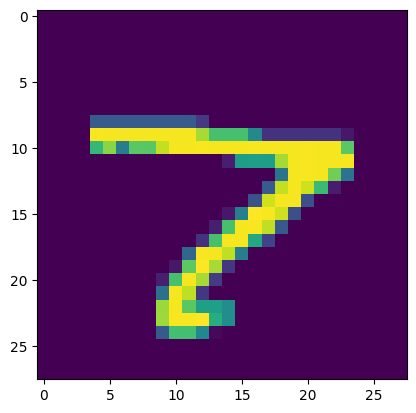

In [15]:
g=plt.imshow(X_train[0][:,:,0])

# Model

In [16]:
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(784, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

early_stopping_monitor=EarlyStopping(patience=2)

model.fit(X_train, y_train, epochs = 10, validation_data= (X_val, y_val), callbacks=[early_stopping_monitor])

Epoch 1/10
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2286 - accuracy: 0.9332 - val_loss: 0.1329 - val_accuracy: 0.9602
Epoch 2/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0904 - accuracy: 0.9724 - val_loss: 0.1043 - val_accuracy: 0.9686
Epoch 3/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0559 - accuracy: 0.9829 - val_loss: 0.0999 - val_accuracy: 0.9719
Epoch 4/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.0895 - val_accuracy: 0.9743
Epoch 5/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0876 - val_accuracy: 0.9764
Epoch 6/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0898 - val_accuracy: 0.9764
Epoch 7/10
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.0897 - val_accuracy:

In [17]:
predictions = model.predict(test_df)
predictions = np.argmax(predictions, axis=1)
predictions=pd.Series(predictions, name='Label')
output = pd.DataFrame({'ImageId': list(range(1, len(predictions)+1)),
                         'Label': predictions})
output.to_csv('submission.csv', index=False)

875/875 [==============================] - 1s 759us/step
